
--- Summary Statistics ---
        cylinders  displacement  horsepower       weight  acceleration  \
count  318.000000    318.000000   312.00000   318.000000    318.000000   
mean     5.380503    188.775157   103.88141  2931.971698     15.538365   
std      1.687736    103.373510    38.52934   828.675761      2.814536   
min      3.000000     68.000000    46.00000  1613.000000      8.000000   
25%      4.000000    101.750000    75.00000  2211.250000     13.900000   
50%      4.000000    140.500000    92.00000  2750.000000     15.500000   
75%      6.000000    258.000000   122.75000  3527.500000     17.000000   
max      8.000000    455.000000   230.00000  5140.000000     24.800000   

       model_year  
count  318.000000  
mean    76.232704  
std      3.757130  
min     70.000000  
25%     73.000000  
50%     76.000000  
75%     79.000000  
max     82.000000  

--- Plotting Histograms ---


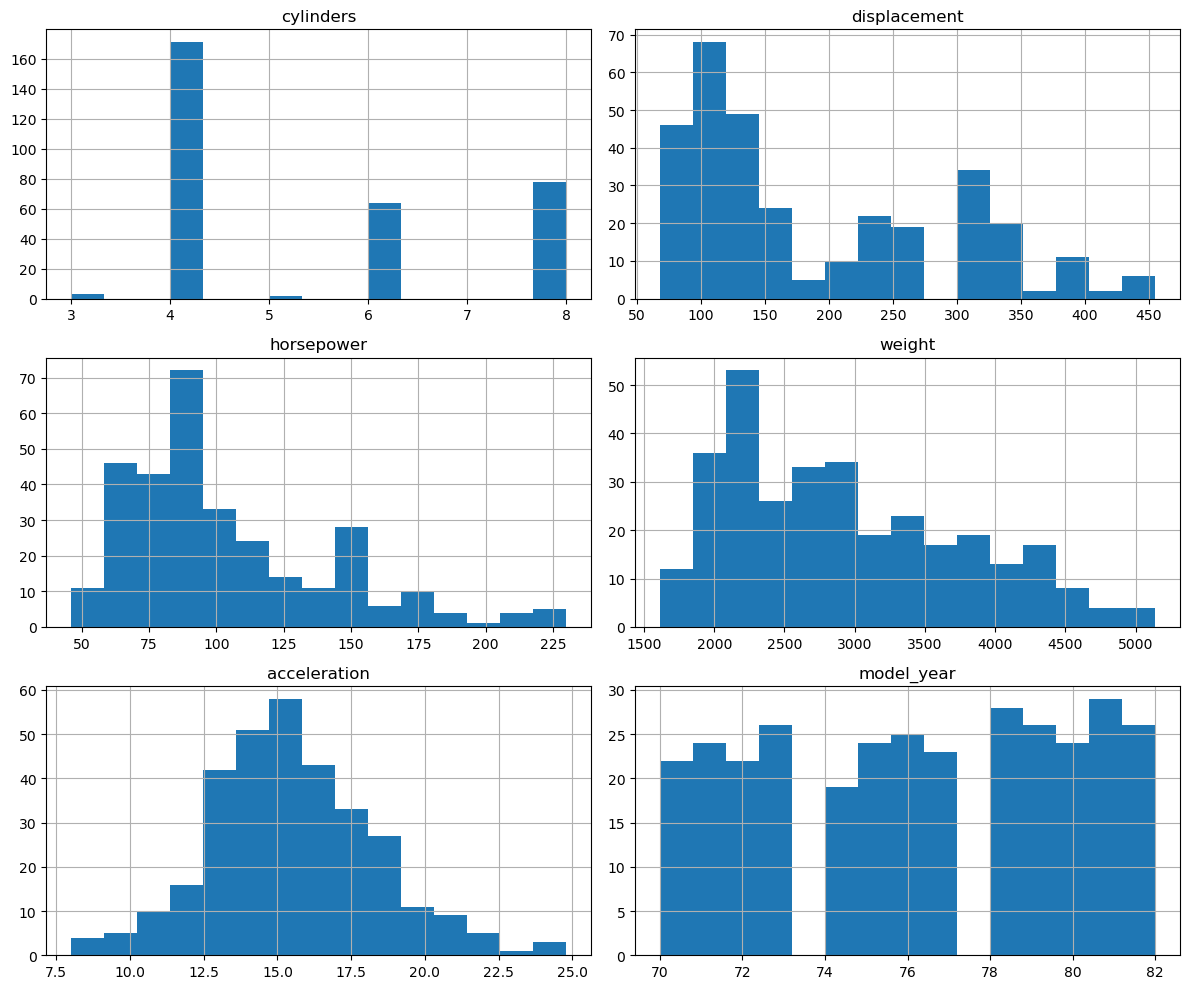

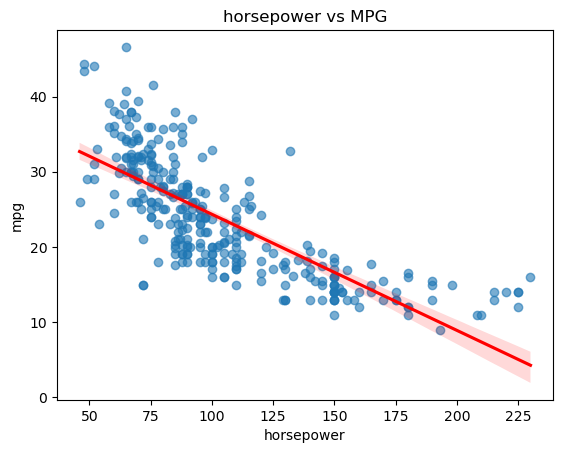

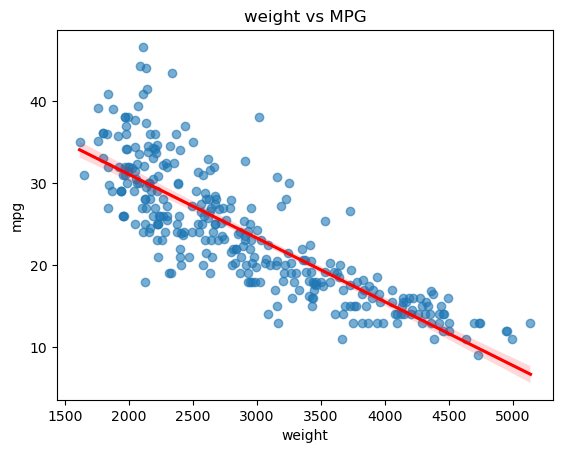

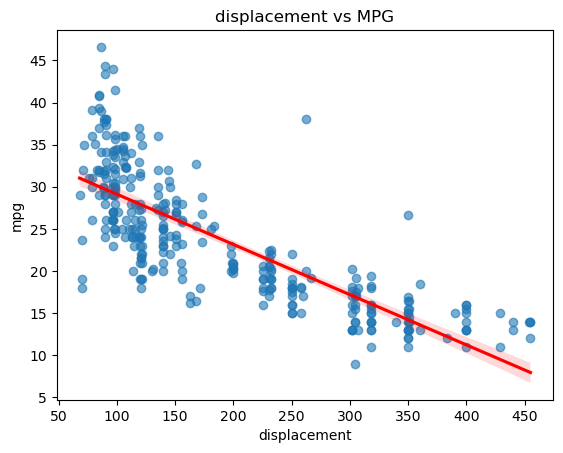

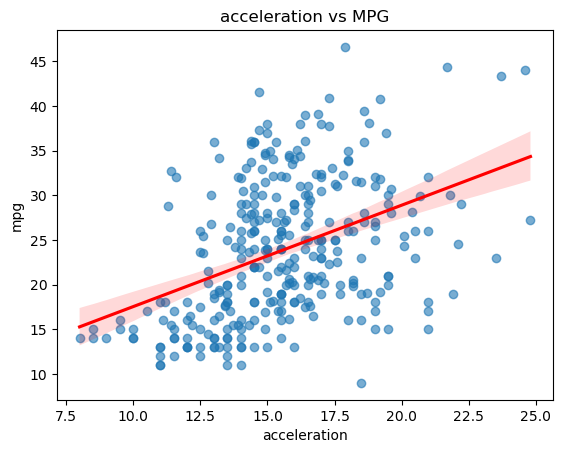

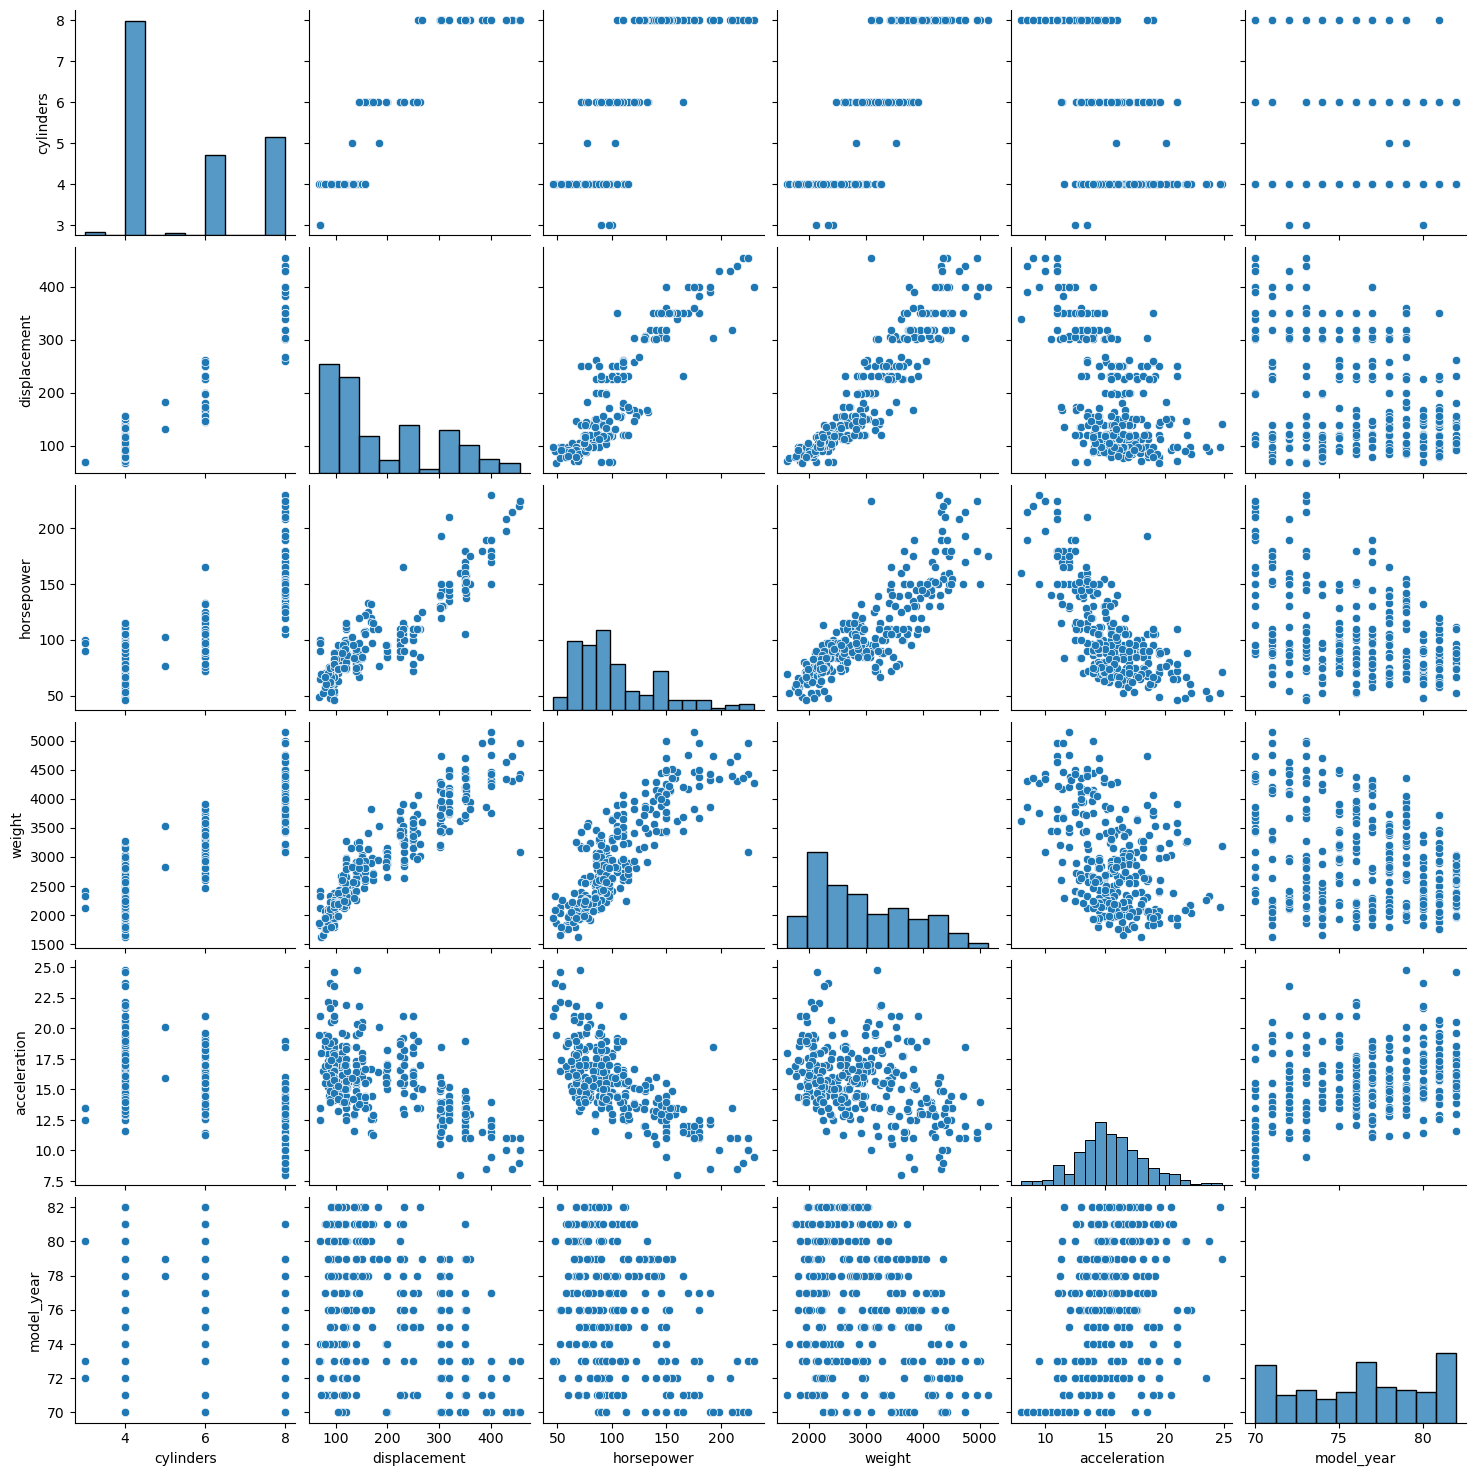

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the training dataset and perform train-test split
data = sns.load_dataset('mpg')

data = data.dropna(subset=['mpg'])

X = data.drop(columns=['mpg'])
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

# Part a: Exploratory data analysis

# Summary Statistics
print("\n--- Summary Statistics ---")
print(X_train.describe())

# Histograms
print("\n--- Plotting Histograms ---")
X_train.hist(bins=15, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Scatterplots
X_train_copy = X_train.copy()
X_train_copy['mpg'] = y_train

for col in ['horsepower', 'weight', 'displacement', 'acceleration']:
    sns.regplot(data=X_train_copy, x=col, y='mpg', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    plt.title(f'{col} vs MPG')
    plt.show()

# Pairplot
num_features = X_train.select_dtypes(exclude=['object'])
sns.pairplot(num_features)

In [9]:
from sklearn.impute import SimpleImputer

# Part b: Data Preprocessing 

# Missing Values
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if missing_counts.empty:
    print("No missing values found!")
else:
    for col, count in missing_counts.items():
        percent = 100 * count / len(data)
        print(f"{col}: {count} missing values ({percent:.2f}%)")
print(f"Total missing values: {missing_counts.sum()}")

# Drop 'name' column
X_train = X_train.drop(columns=['name'])
X_test = X_test.drop(columns=['name'])

# Impute categorical columns using mode (most frequent)
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns using median
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# One-hot encode 'origin'
X_train = pd.get_dummies(X_train, columns=['origin'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['origin'], drop_first=True)

horsepower: 6 missing values (1.51%)
Total missing values: 6


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Part c: Perform the linear regression 

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.Series(model.coef_, index=X_train.columns)
print("Coefficients:\n", coefficients)

# Training performance
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Testing performance
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training R²: {r2_train:.4f}, MSE: {mse_train:.4f}")
print(f"Testing R²: {r2_test:.4f}, MSE: {mse_test:.4f}")

Coefficients:
 cylinders      -0.619244
displacement    0.028381
horsepower     -0.014544
weight         -0.007201
acceleration    0.113715
model_year      0.738914
origin_japan    0.376759
origin_usa     -2.617157
dtype: float64
Training R²: 0.8194, MSE: 10.7770
Testing R²: 0.8339, MSE: 10.6361
